In [1]:
from common.path import *
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

mpl.rc('figure', figsize=(10, 7))

In [2]:
PANDEMIC_DAY_ZERO = '2020-02-06'

all_cases = pd.read_parquet(PROCESSED_DATA_DIR / 'casos.parquet')
true_covid_cases = all_cases[all_cases.dg_covid == 1]
non_covid_cases = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
unknow_cases = all_cases[(all_cases.dg_covid == 0) & (all_cases.vac_covid == 0) & (all_cases.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]

all_deaths = all_cases[all_cases.evo_obito==1]
true_covid_deaths = all_deaths[all_deaths.dg_covid == 1]
non_covid_deaths = all_deaths[(all_deaths.dg_covid == 0) & (all_deaths.vac_covid == 0) & (all_deaths.cad_dt_notificacao < PANDEMIC_DAY_ZERO)]
unknow_deaths = all_deaths[(all_deaths.dg_covid == 0) & (all_deaths.vac_covid == 0) & (all_deaths.cad_dt_notificacao >= PANDEMIC_DAY_ZERO)]

RISK_FACTORS = [column for column in all_cases.columns.to_list() if ('fr_' in column)]
SYMPTOMS = [column for column in all_cases.columns.to_list() if ('sint_' in column)]

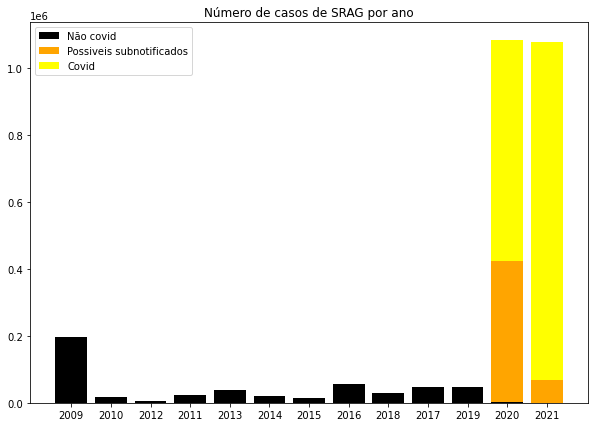

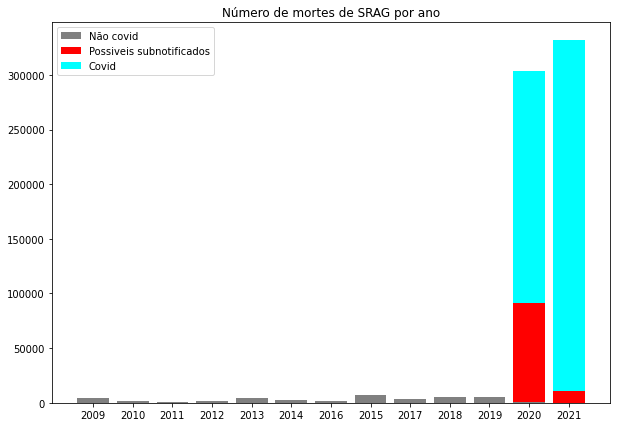

In [3]:
if True:
    x = all_cases.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = np.concatenate([non_covid_cases.groupby(non_covid_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy(), [0]])
    y1 = np.concatenate([[0 for _ in range(11)], unknow_cases.groupby(unknow_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])
    y2 = np.concatenate([[0 for _ in range(11)], true_covid_cases.groupby(true_covid_cases.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])

    plt.bar(x, y0, color='black', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='orange', label='Possiveis subnotificados')
    plt.bar(x, y2, bottom=y1, color='yellow', label='Covid')

    plt.title("Número de casos de SRAG por ano")
    plt.legend()
    plt.show()

if True:
    x = all_deaths.cad_dt_notificacao.dt.strftime('%Y').unique()
    y0 = np.concatenate([non_covid_deaths.groupby(non_covid_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy(), [0]])
    y1 = np.concatenate([[0 for _ in range(11)], unknow_deaths.groupby(unknow_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])
    y2 = np.concatenate([[0 for _ in range(11)], true_covid_deaths.groupby(true_covid_deaths.cad_dt_notificacao.dt.strftime('%Y')).size().to_numpy()])

    plt.bar(x, y0, color='grey', label='Não covid')
    plt.bar(x, y1, bottom=y0, color='red', label='Possiveis subnotificados')
    plt.bar(x, y2, bottom=y1, color='cyan', label='Covid')

    plt.title("Número de mortes de SRAG por ano")
    plt.legend()
    plt.show()

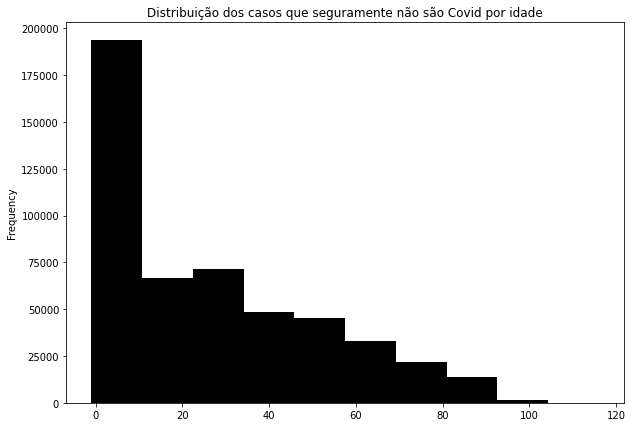

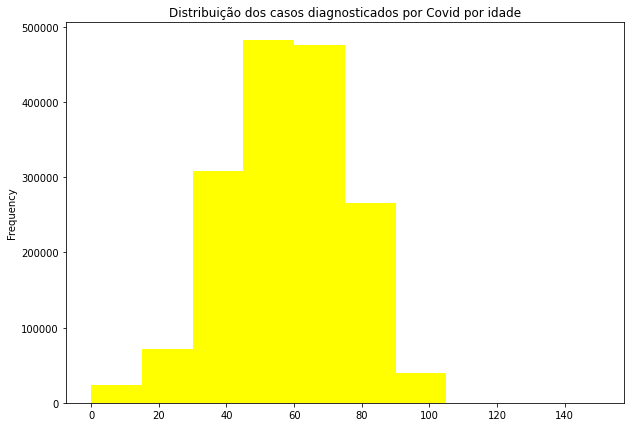

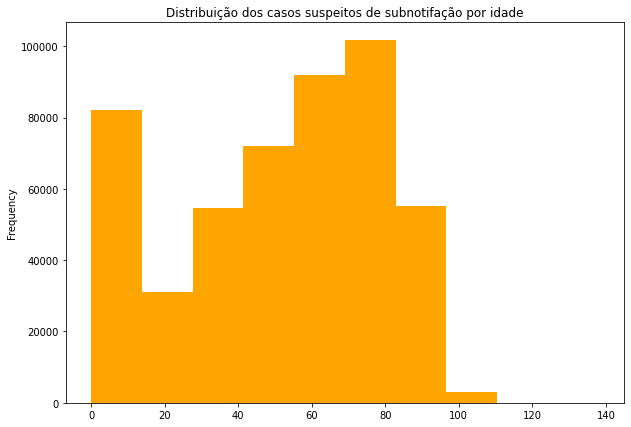

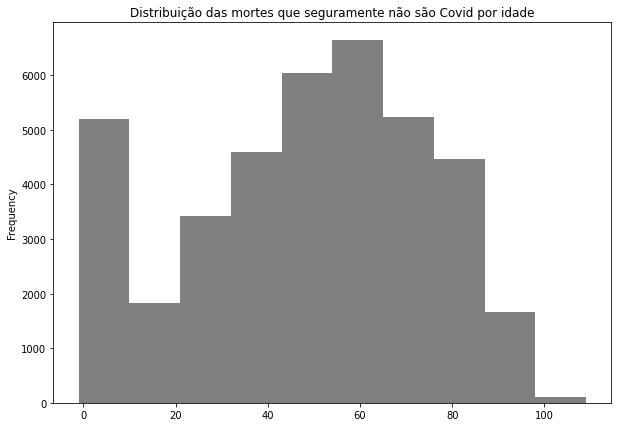

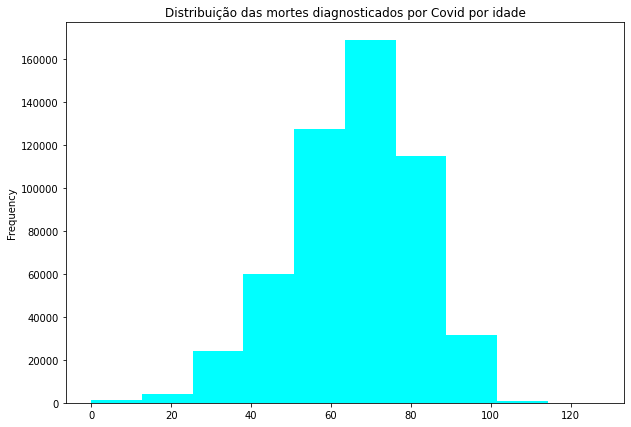

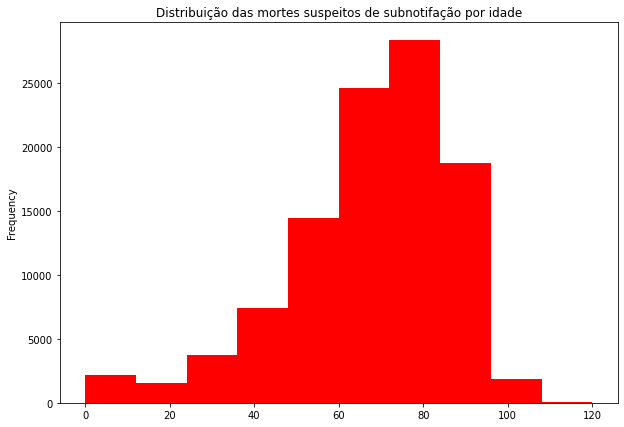

In [4]:
plt.title("Distribuição dos casos que seguramente não são Covid por idade")
non_covid_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='black')
plt.show()

plt.title("Distribuição dos casos diagnosticados por Covid por idade")
true_covid_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='yellow')
plt.show()

plt.title("Distribuição dos casos suspeitos de subnotifação por idade")
unknow_cases.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='orange')
plt.show()

plt.title("Distribuição das mortes que seguramente não são Covid por idade")
non_covid_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='grey')
plt.show()

plt.title("Distribuição das mortes diagnosticados por Covid por idade")
true_covid_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='cyan')
plt.show()

plt.title("Distribuição das mortes suspeitos de subnotifação por idade")
unknow_deaths.dropna(subset=['cad-idade']).set_index('cad_dt_notificacao')['cad-idade'].plot(kind='hist', color='red')
plt.show()

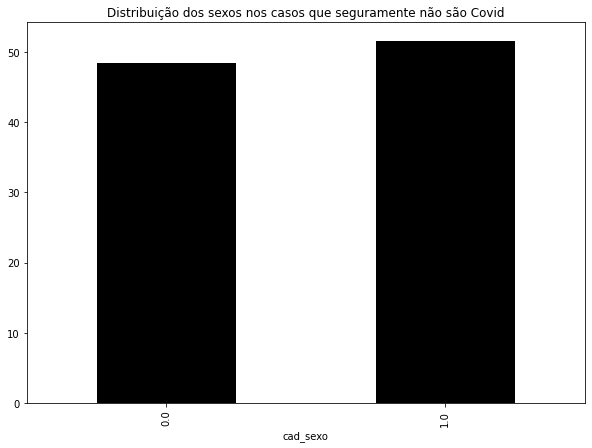

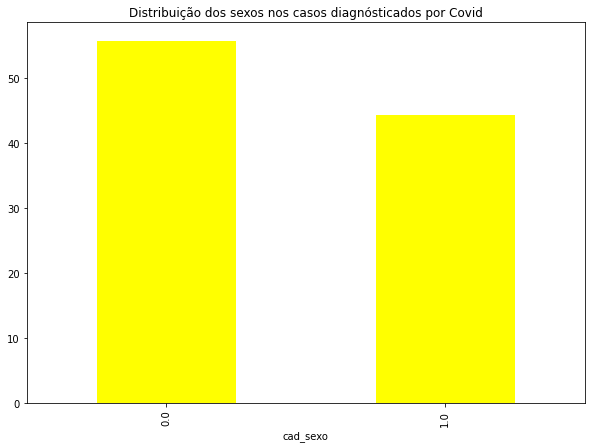

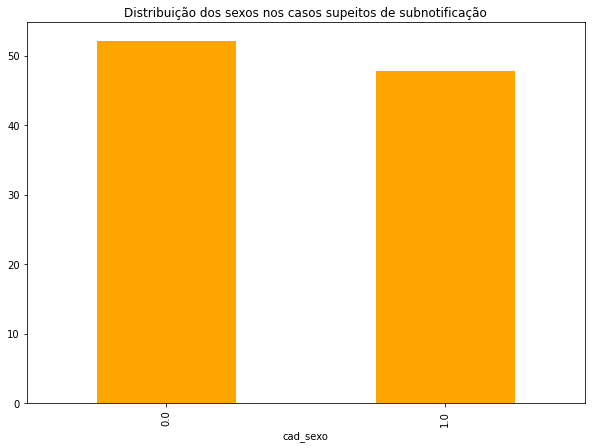

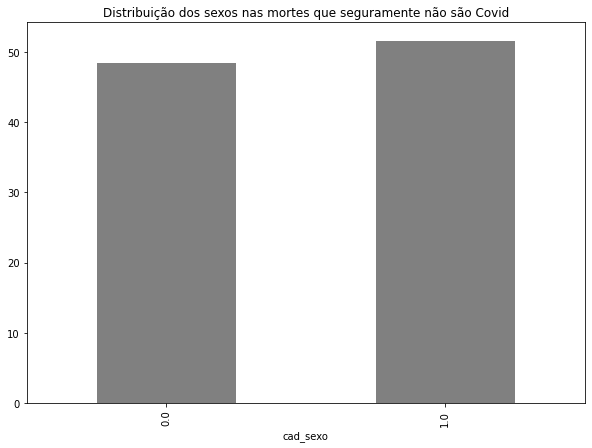

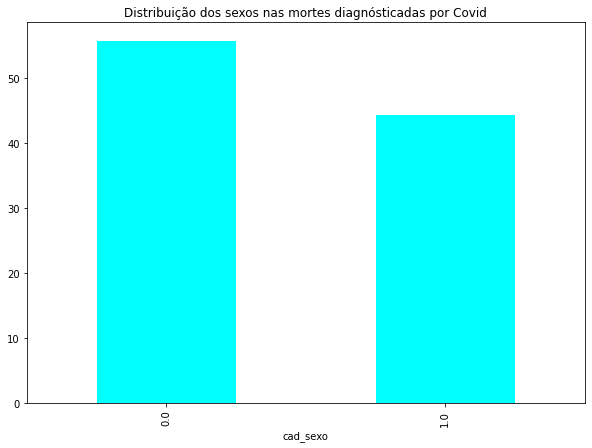

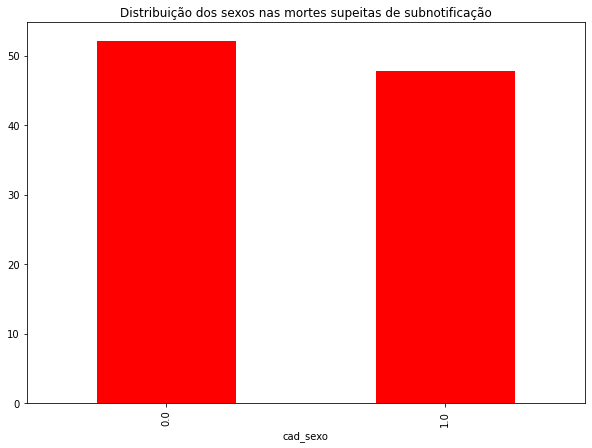

In [5]:
plt.title('Distribuição dos sexos nos casos que seguramente não são Covid')
non_covid_cases.groupby('cad_sexo').size().divide(len(non_covid_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Distribuição dos sexos nos casos diagnósticados por Covid')
true_covid_cases.groupby('cad_sexo').size().divide(len(true_covid_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Distribuição dos sexos nos casos supeitos de subnotificação')
unknow_cases.groupby('cad_sexo').size().divide(len(unknow_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

plt.title('Distribuição dos sexos nas mortes que seguramente não são Covid')
non_covid_cases.groupby('cad_sexo').size().divide(len(non_covid_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Distribuição dos sexos nas mortes diagnósticadas por Covid')
true_covid_cases.groupby('cad_sexo').size().divide(len(true_covid_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Distribuição dos sexos nas mortes supeitas de subnotificação')
unknow_cases.groupby('cad_sexo').size().divide(len(unknow_cases.dropna(subset=['cad_sexo']))).multiply(100).plot(kind='bar', color='red')
plt.show()

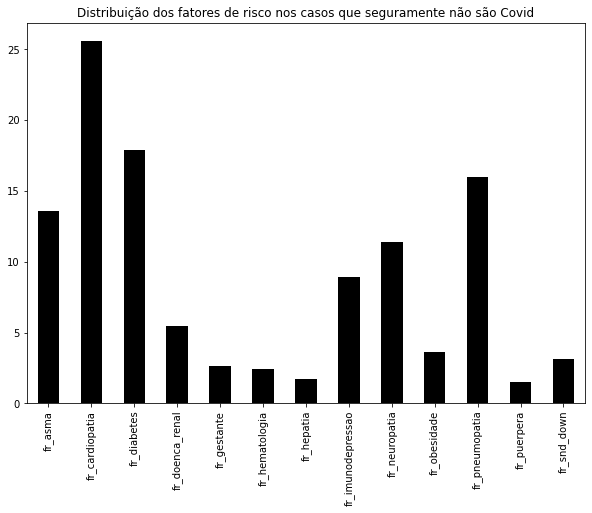

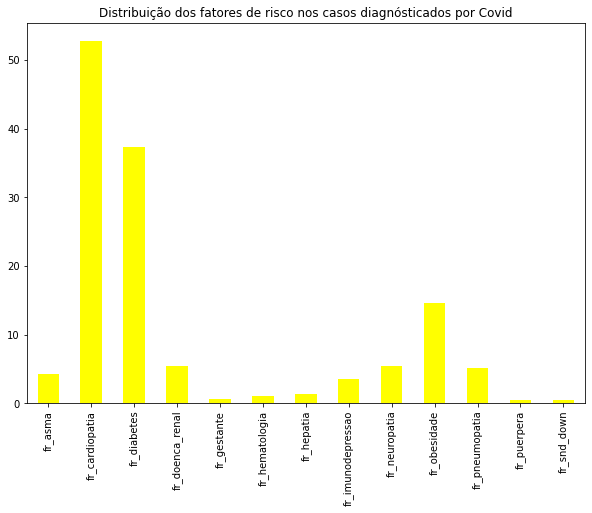

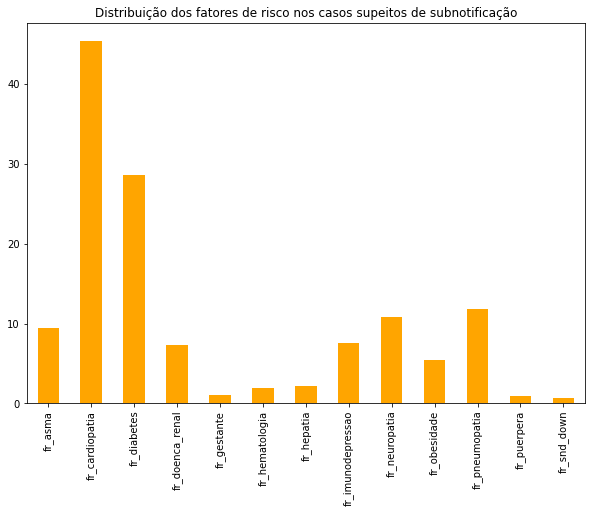

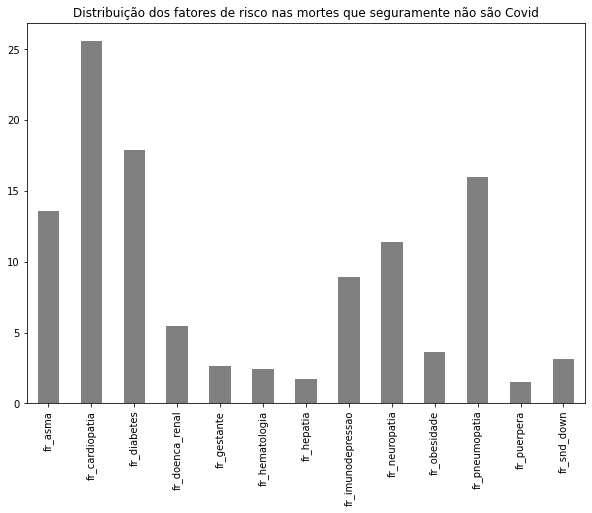

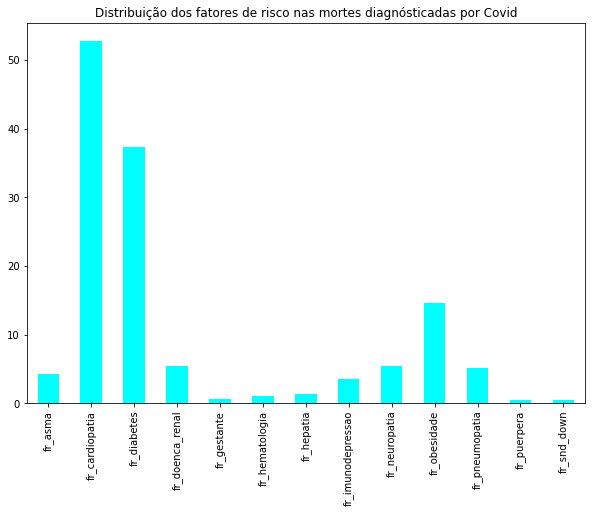

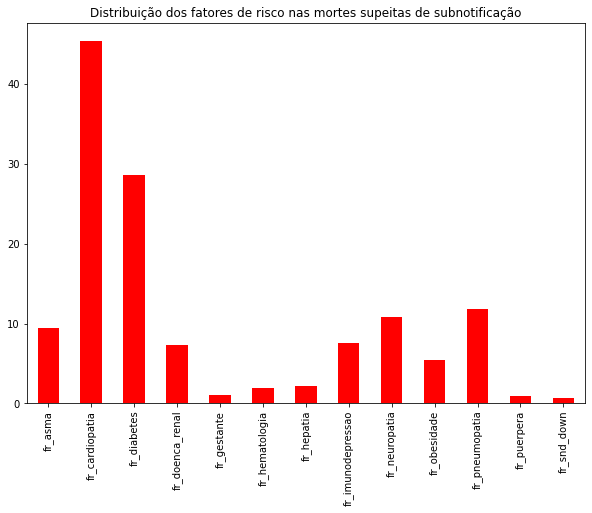

In [6]:
plt.title('Distribuição dos fatores de risco nos casos que seguramente não são Covid')
non_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Distribuição dos fatores de risco nos casos diagnósticados por Covid')
true_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Distribuição dos fatores de risco nos casos supeitos de subnotificação')
unknow_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='orange')
plt.show()

plt.title('Distribuição dos fatores de risco nas mortes que seguramente não são Covid')
non_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Distribuição dos fatores de risco nas mortes diagnósticadas por Covid')
true_covid_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Distribuição dos fatores de risco nas mortes supeitas de subnotificação')
unknow_cases[RISK_FACTORS].dropna(subset=RISK_FACTORS).mean().multiply(100).plot(kind='bar', color='red')
plt.show()

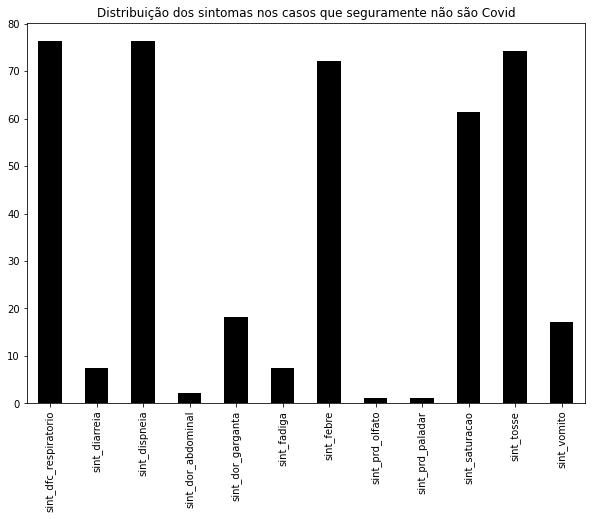

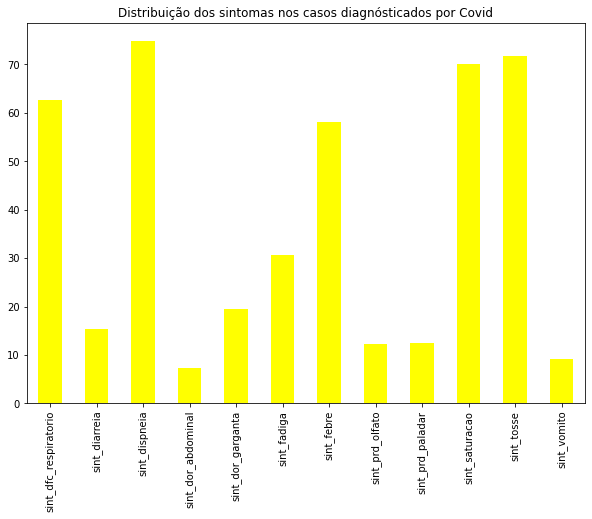

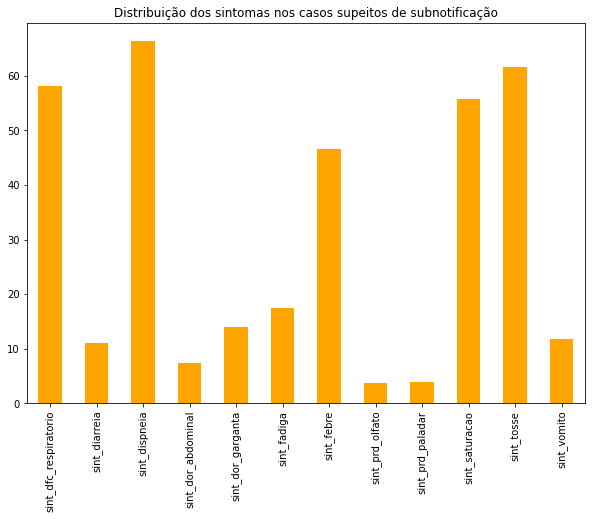

In [7]:
plt.title('Distribuição dos sintomas nos casos que seguramente não são Covid')
non_covid_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title('Distribuição dos sintomas nos casos diagnósticados por Covid')
true_covid_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title('Distribuição dos sintomas nos casos supeitos de subnotificação')
unknow_cases[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='orange')
plt.show()

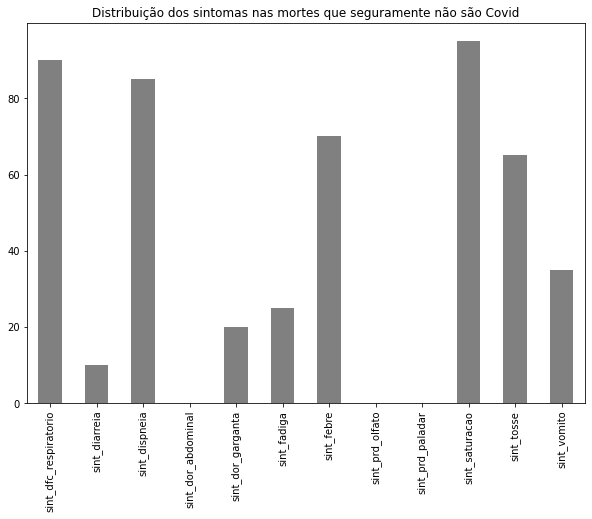

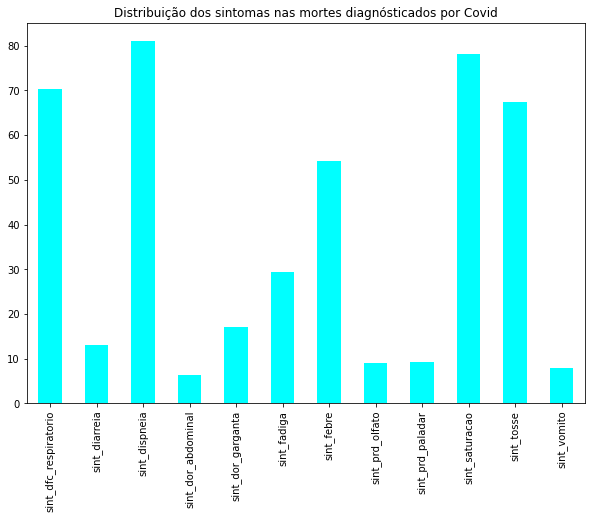

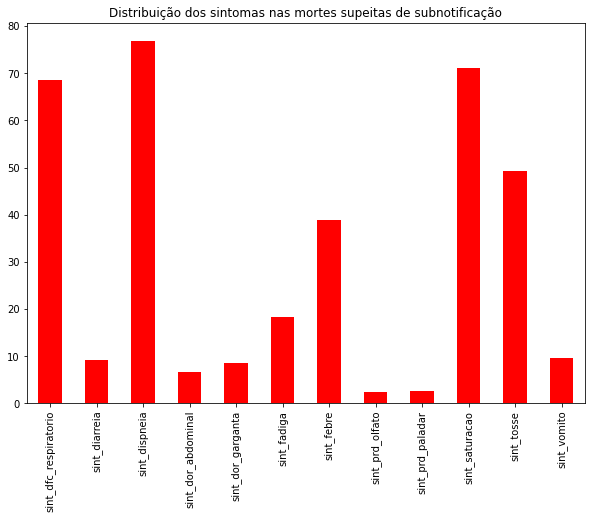

In [8]:
plt.title('Distribuição dos sintomas nas mortes que seguramente não são Covid')
non_covid_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title('Distribuição dos sintomas nas mortes diagnósticados por Covid')
true_covid_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title('Distribuição dos sintomas nas mortes supeitas de subnotificação')
unknow_deaths[SYMPTOMS].dropna(subset=SYMPTOMS).mean().multiply(100).plot(kind='bar', color='red')
plt.show()

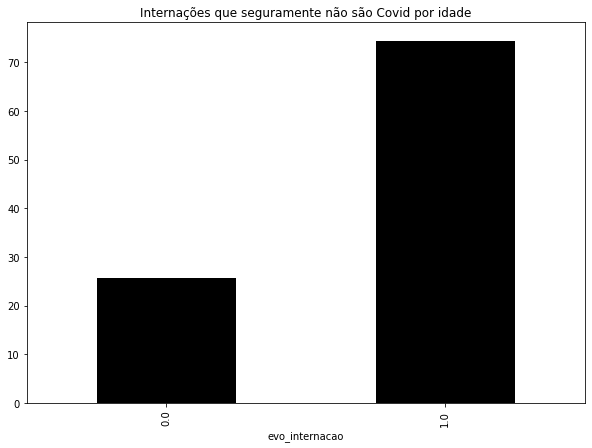

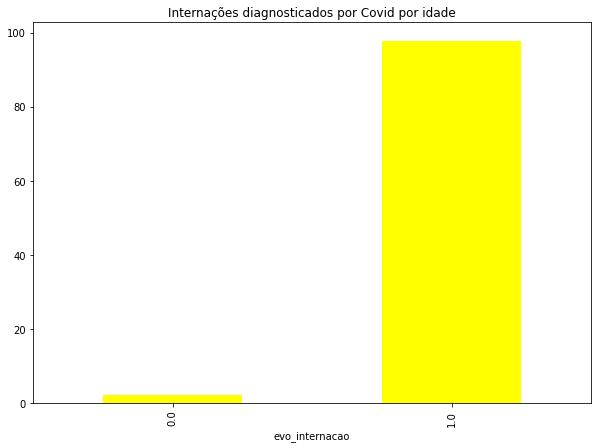

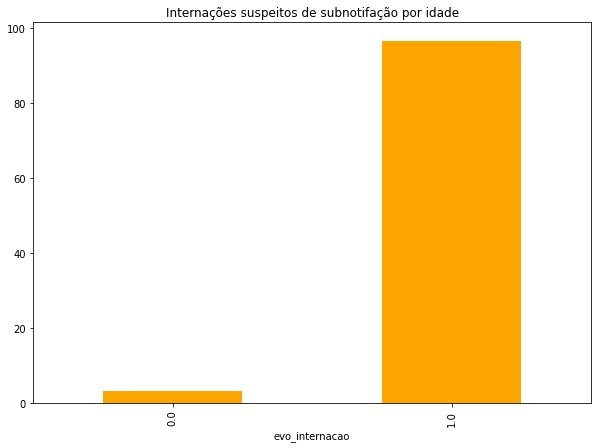

In [9]:
plt.title("Internações que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_internacao').size().divide(len(non_covid_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Internações diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_internacao').size().divide(len(true_covid_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Internações suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_internacao').size().divide(len(unknow_cases.dropna(subset=['evo_internacao']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

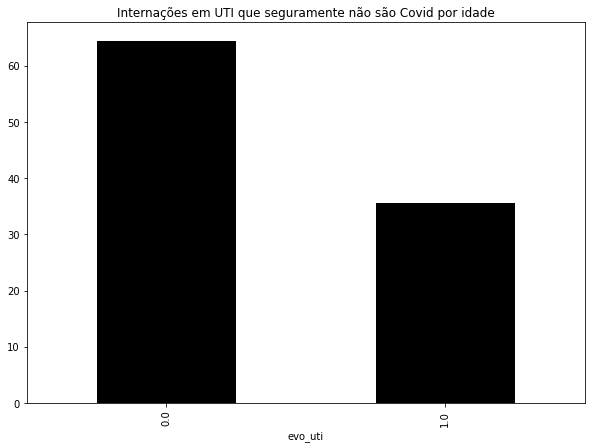

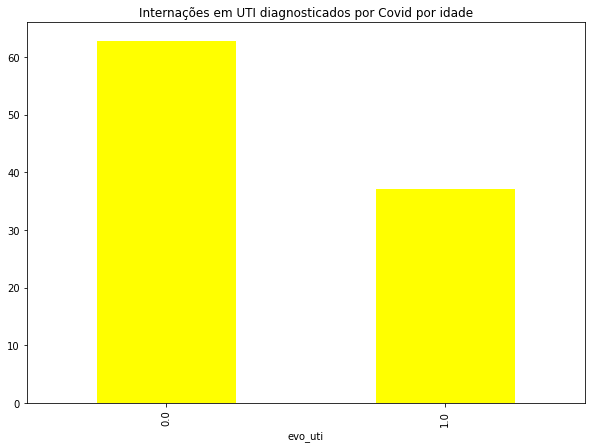

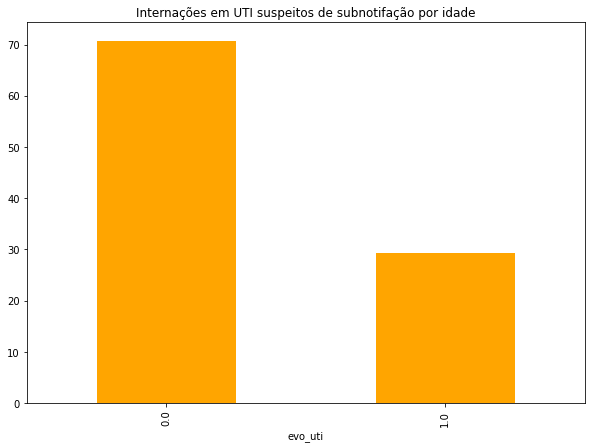

In [10]:
plt.title("Internações em UTI que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_uti').size().divide(len(non_covid_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Internações em UTI diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_uti').size().divide(len(true_covid_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Internações em UTI suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_uti').size().divide(len(unknow_cases.dropna(subset=['evo_uti']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

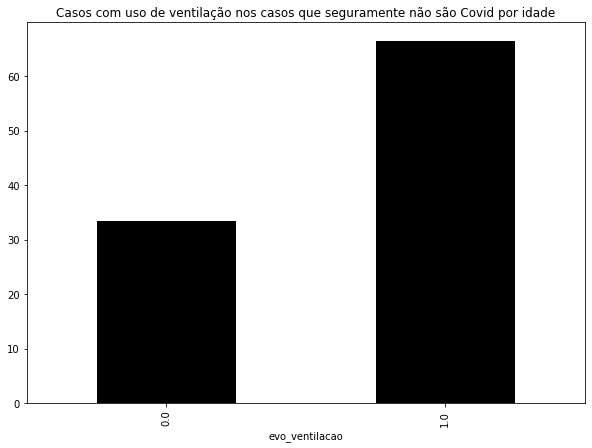

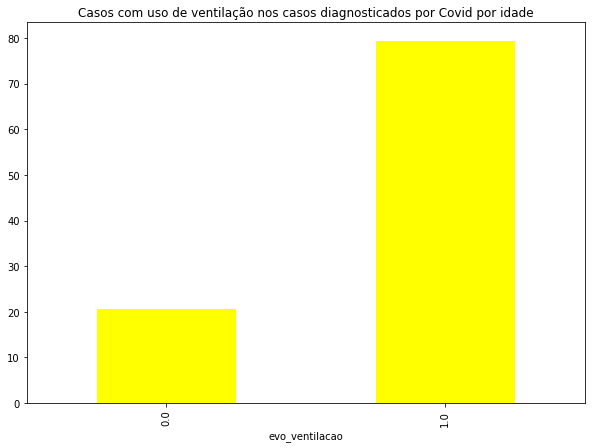

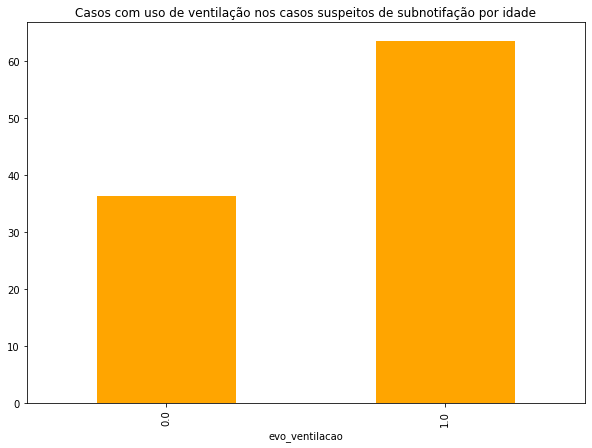

In [11]:
plt.title("Casos com uso de ventilação nos casos que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_ventilacao').size().divide(len(non_covid_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='black')
plt.show()

plt.title("Casos com uso de ventilação nos casos diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_ventilacao').size().divide(len(true_covid_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='yellow')
plt.show()

plt.title("Casos com uso de ventilação nos casos suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_ventilacao').size().divide(len(unknow_cases.dropna(subset=['evo_ventilacao']))).multiply(100).plot(kind='bar', color='orange')
plt.show()

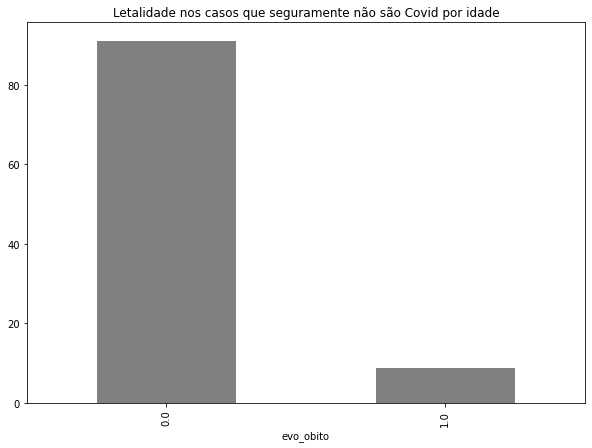

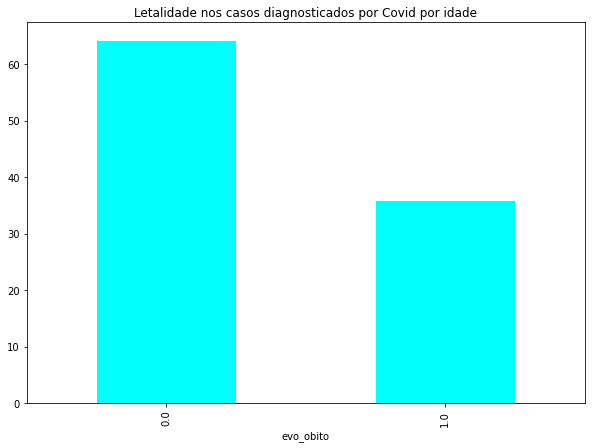

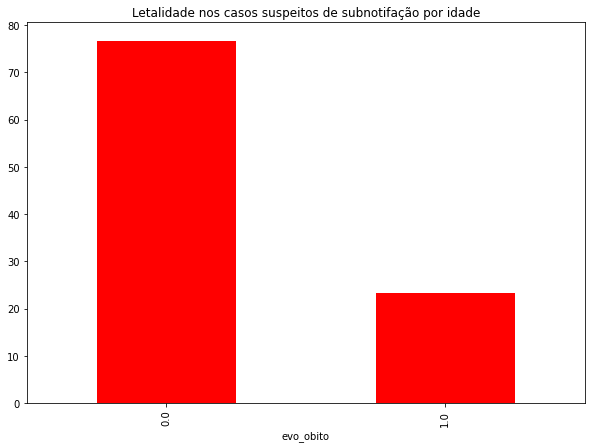

In [14]:
plt.title("Letalidade nos casos que seguramente não são Covid por idade")
non_covid_cases.groupby('evo_obito').size().divide(len(non_covid_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='grey')
plt.show()

plt.title("Letalidade nos casos diagnosticados por Covid por idade")
true_covid_cases.groupby('evo_obito').size().divide(len(true_covid_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='cyan')
plt.show()

plt.title("Letalidade nos casos suspeitos de subnotifação por idade")
unknow_cases.groupby('evo_obito').size().divide(len(unknow_cases.dropna(subset=['evo_obito']))).multiply(100).plot(kind='bar', color='red')
plt.show()

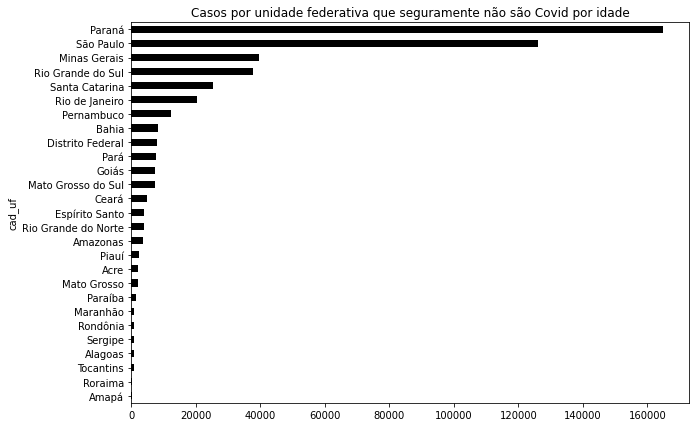

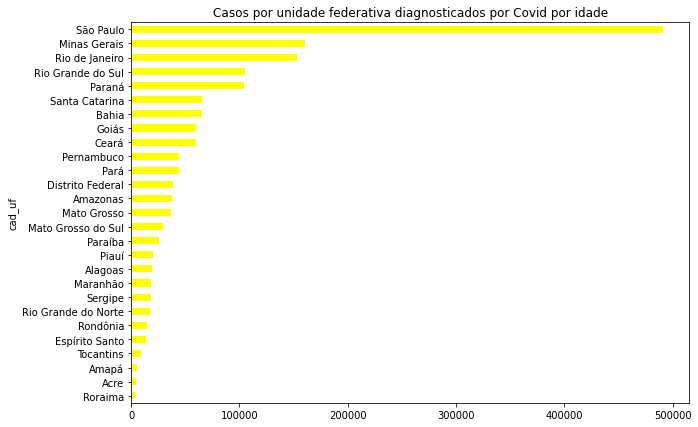

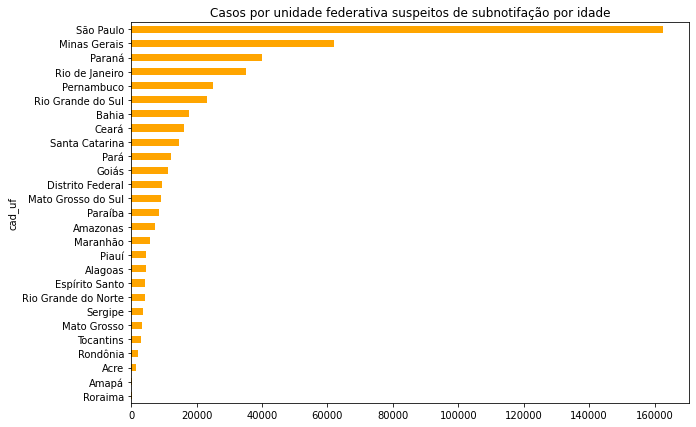

In [12]:
plt.title("Casos por unidade federativa que seguramente não são Covid por idade")
non_covid_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='black')
plt.show()

plt.title("Casos por unidade federativa diagnosticados por Covid por idade")
true_covid_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='yellow')
plt.show()

plt.title("Casos por unidade federativa suspeitos de subnotifação por idade")
unknow_cases.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='orange')
plt.show()

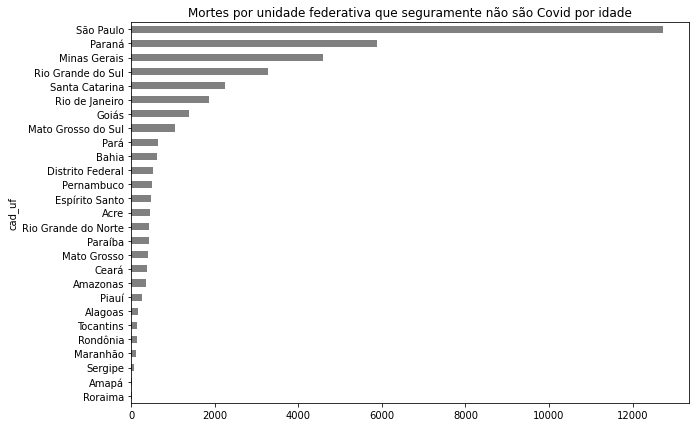

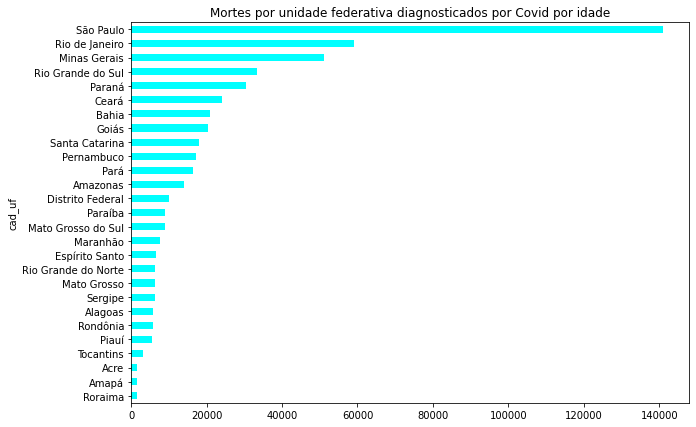

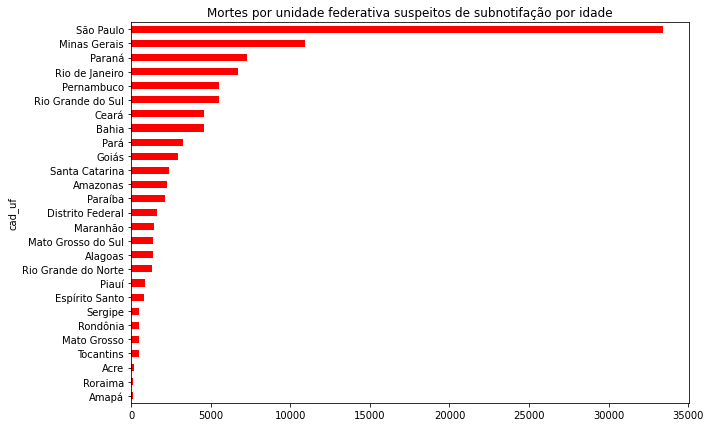

In [13]:
plt.title("Mortes por unidade federativa que seguramente não são Covid por idade")
non_covid_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='grey')
plt.show()

plt.title("Mortes por unidade federativa diagnosticados por Covid por idade")
true_covid_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='cyan')
plt.show()

plt.title("Mortes por unidade federativa suspeitos de subnotifação por idade")
unknow_deaths.groupby('cad_uf').size().sort_values(ascending=True).plot(kind='barh', color='red')
plt.show()